In [1]:
%matplotlib inline
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import scipy
import os

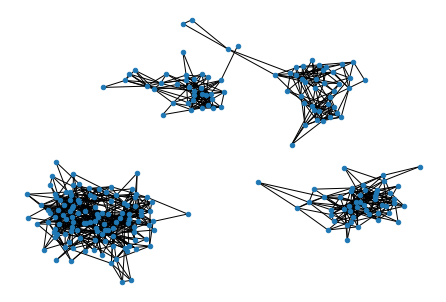

In [26]:
with open('data/example1.dat') as f:
    edges = [tuple([int(x) for x in line.strip().split(',')]) for line in f]
    
# Extract nodes
nodes = np.unique(np.asarray(edges))
num_nodes = nodes.shape[0]

# Visualize graph
G = nx.Graph()
G.add_nodes_from(nodes)
G.add_edges_from(edges)
nx.draw(G, node_size=20, pos=nx.spring_layout(G, k=0.05, iterations=20))
plt.show()

>K-eigenvector algorithm

In [27]:
# Construct affinity matrix A
A = np.zeros([num_nodes, num_nodes])
for tup in edges:
    A[tup[0]-1, tup[1]-1] = 1
    
# Construct diagonal matrix D
D = np.diag(np.sum(A, axis=1))

# Construct the matrix L (called normalized laplacian)
D_ = np.linalg.inv(np.sqrt(D))
L = np.dot(np.dot(D_, A), D_)

In [28]:
A[A[:, :] >1]


array([], dtype=float64)

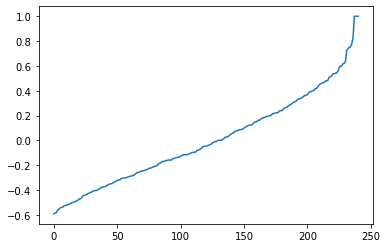

In [29]:
# Extract the eignevalues (ascending order) and normalized (unit “length”) eigenvectors of L 
w, v = scipy.linalg.eigh(L)
plt.plot(w)
plt.show()

In [30]:
w

array([-5.93066504e-01, -5.85441209e-01, -5.83588708e-01, -5.61678808e-01,
       -5.55254112e-01, -5.45678990e-01, -5.40801767e-01, -5.39093724e-01,
       -5.28095146e-01, -5.25412615e-01, -5.22867997e-01, -5.18072784e-01,
       -5.14265956e-01, -5.11843837e-01, -5.04602435e-01, -5.00000000e-01,
       -4.99012418e-01, -4.93254508e-01, -4.86373152e-01, -4.83569878e-01,
       -4.71795892e-01, -4.70955536e-01, -4.62486468e-01, -4.45857456e-01,
       -4.44671715e-01, -4.39150244e-01, -4.36743052e-01, -4.28241108e-01,
       -4.24861461e-01, -4.21702593e-01, -4.14499079e-01, -4.08929374e-01,
       -4.06397321e-01, -4.05207694e-01, -4.03743414e-01, -3.95146278e-01,
       -3.90914598e-01, -3.80580722e-01, -3.79956582e-01, -3.73745886e-01,
       -3.73648261e-01, -3.70551859e-01, -3.62963005e-01, -3.57994407e-01,
       -3.51877088e-01, -3.49939806e-01, -3.49137740e-01, -3.37803890e-01,
       -3.35768535e-01, -3.29412536e-01, -3.21913407e-01, -3.20975073e-01,
       -3.18278329e-01, -

In [31]:

# Find optimal k (where the eigenvalues start dropping)
k = np.argmin(np.ediff1d(np.flipud(w))) + 1
print('k = %d' % k)

k = 4


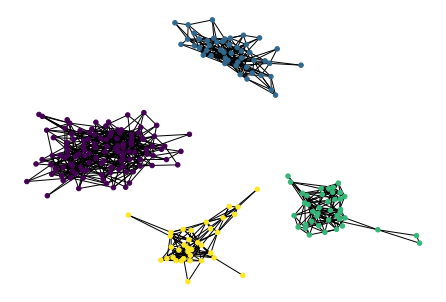

In [32]:

# Extract k largest eigenvectors
X = v[:, num_nodes - k:]

# Construct matrix Y by renormalizing X
Y = np.divide(X, np.reshape(np.linalg.norm(X, axis=1), (X.shape[0], 1)))

# Cluster rows of Y into k clusters using K-means 
kmeans = KMeans(n_clusters=k, random_state=1234).fit(Y)

# Assign original point i to the cluster of the row i of matrix Y
cluster_labels = kmeans.labels_
nx.draw(G, node_size=20, pos=nx.spring_layout(G, k=0.05, iterations=20), node_color=cluster_labels)

>Find communities using the Fiedler Vector

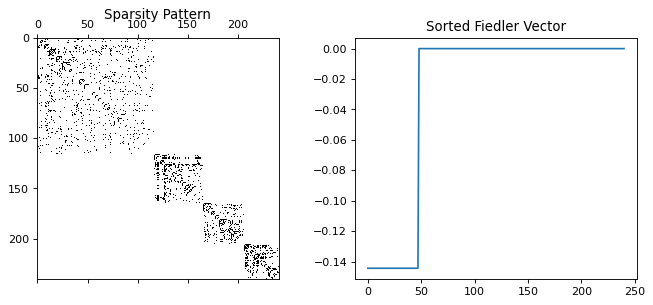

In [13]:
# Construct affinity matrix A
A = np.zeros([num_nodes, num_nodes])
for tup in edges:
    A[tup[0]-1, tup[1]-1] = 1
    
# Construct diagonal matrix D
D = np.diag(np.sum(A, axis=1))

# Construct Laplacian matrix L
L = D - A

# Get eigenvalues in ascending order
w, X = scipy.linalg.eigh(L) 

# Get Fiedler Vector: The eigenvector corresponding to second smallest eigenvalue of L
fv = X[:, 1]

# Plot the sparsity pattern and sorted fiedler vector
fig=plt.figure(figsize=(10, 4), dpi= 80, facecolor='w', edgecolor='k')
plt.subplot(1,2,1)
plt.spy(A) 
plt.title('Sparsity Pattern')
plt.subplot(1,2,2)
plt.plot(np.sort(fv))
plt.title('Sorted Fiedler Vector')
plt.show()

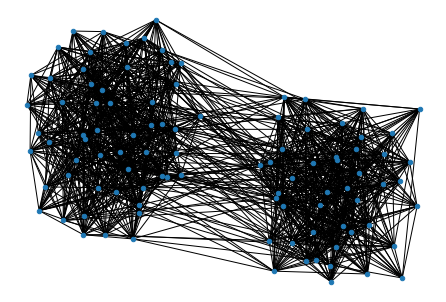

In [14]:
with open('data/example2.dat') as f:
    edges = [tuple([int(x) for x in line.strip().split(',')])[0:2] for line in f]
    
# Extract nodes
nodes = np.unique(np.asarray(edges))
num_nodes = nodes.shape[0]

# Visualize graph
G = nx.Graph()
G.add_nodes_from(nodes)
G.add_edges_from(edges)
nx.draw(G, node_size=20, pos=nx.spring_layout(G, k=0.05, iterations=20))
plt.show()

>K-eigenvector algorithm

In [15]:
# Construct affinity matrix A
A = np.zeros([num_nodes, num_nodes])
for tup in edges:
    A[tup[0]-1, tup[1]-1] = 1
    
# Construct diagonal matrix D
D = np.diag(np.sum(A, axis=1))

# Construct the matrix L (called normalized laplacian)
D_ = np.linalg.inv(np.sqrt(D))
L = np.dot(np.dot(D_, A), D_)

In [16]:
D.shape

(100, 100)

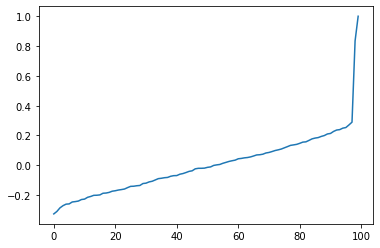

In [17]:
# Extract the eignevalues (ascending order) and normalized (unit “length”) eigenvectors of L 
w, v = scipy.linalg.eigh(L)
plt.plot(w)
plt.show()

In [18]:
w

array([-3.26154151e-01, -3.09745777e-01, -2.85762816e-01, -2.70777577e-01,
       -2.60609245e-01, -2.58968057e-01, -2.46060830e-01, -2.43456905e-01,
       -2.39827442e-01, -2.29656760e-01, -2.26831644e-01, -2.14665872e-01,
       -2.09072532e-01, -2.01449175e-01, -2.00839382e-01, -1.98561897e-01,
       -1.87517684e-01, -1.86077729e-01, -1.81789185e-01, -1.73773578e-01,
       -1.70715633e-01, -1.66012359e-01, -1.62869151e-01, -1.59164628e-01,
       -1.49680316e-01, -1.41246953e-01, -1.40353626e-01, -1.37134896e-01,
       -1.35339957e-01, -1.22302528e-01, -1.19810121e-01, -1.11484009e-01,
       -1.07067015e-01, -9.83652476e-02, -8.95104224e-02, -8.69352734e-02,
       -8.32125762e-02, -8.14261033e-02, -7.36386499e-02, -6.95182802e-02,
       -6.89018176e-02, -5.98204272e-02, -5.54606675e-02, -4.85265866e-02,
       -4.08039240e-02, -3.69882071e-02, -2.37863918e-02, -2.02125492e-02,
       -2.00284349e-02, -1.90275797e-02, -1.36478567e-02, -1.08231759e-02,
       -8.04580028e-04,  

In [19]:

# Find optimal k (where the eigenvalues start dropping)
k = np.argmin(np.ediff1d(np.flipud(w))) + 1
print('k = %d' % k)

k = 2


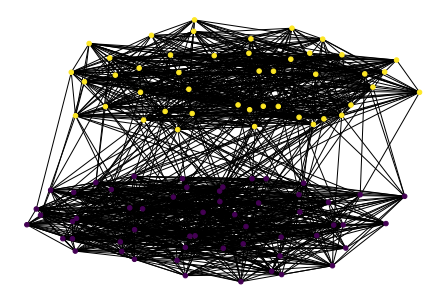

In [22]:

# Extract k largest eigenvectors
X = v[:, num_nodes - k:]

# Construct matrix Y by renormalizing X
Y = np.divide(X, np.reshape(np.linalg.norm(X, axis=1), (X.shape[0], 1)))

# Cluster rows of Y into k clusters using K-means 
kmeans = KMeans(n_clusters=k, random_state=1234).fit(Y)

# Assign original point i to the cluster of the row i of matrix Y
cluster_labels = kmeans.labels_
nx.draw(G, node_size=20, pos=nx.spring_layout(G, k=0.05, iterations=20), node_color=cluster_labels)

>Find communities using the Fiedler Vector

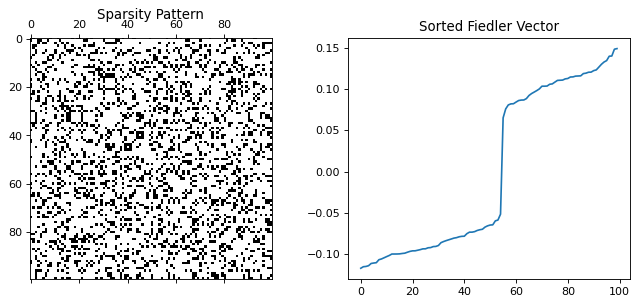

In [23]:
# Construct affinity matrix A
A = np.zeros([num_nodes, num_nodes])
for tup in edges:
    A[tup[0]-1, tup[1]-1] = 1
    
# Construct diagonal matrix D
D = np.diag(np.sum(A, axis=1))

# Construct Laplacian matrix L
L = D - A

# Get eigenvalues in ascending order
w, X = scipy.linalg.eigh(L) 

# Get Fiedler Vector: The eigenvector corresponding to second smallest eigenvalue of L
fv = X[:, 1]

# Plot the sparsity pattern and sorted fiedler vector
fig=plt.figure(figsize=(10, 4), dpi= 80, facecolor='w', edgecolor='k')
plt.subplot(1,2,1)
plt.spy(A) 
plt.title('Sparsity Pattern')
plt.subplot(1,2,2)
plt.plot(np.sort(fv))
plt.title('Sorted Fiedler Vector')
plt.show()